In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('hotel.csv')
df.head()

,hardware_id,created_at,Wh,voltage ry,voltage yb,voltage br,Voltage R,Voltage Y,Voltage B,Current R,Current Y,Current B
0,abcdefgh,2019-06-27T23:16:00.000Z,72350.99986,0,406,404,233,236,233,17.125,16.500,18.750
1,abcdefgh,2019-06-27T23:15:00.000Z,72328.45597,0,406,404,233,237,234,17.000,16.500,18.750
2,abcdefgh,2019-06-27T23:13:00.000Z,72306.34808,0,408,404,234,236,234,17.000,16.875,18.750
3,abcdefgh,2019-06-27T23:11:00.000Z,72284.64116,0,406,404,233,236,234,17.125,16.625,18.750
4,abcdefgh,2019-06-27T23:09:00.000Z,72263.26715,0,406,402,232,235,233,17.000,16.750,18.375


In [3]:
df.describe()

,Wh,voltage ry,voltage yb,voltage br,Voltage R,Voltage Y,Voltage B,Current R,Current Y,Current B
count,572.000000,572.0,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000,572.000000
mean,66411.311441,0.0,405.720280,402.454545,231.984266,235.720280,232.923077,11.330911,11.058239,11.984156
std,3614.438586,0.0,3.573409,3.658308,2.267125,2.030953,2.034129,6.327414,6.149625,6.486260
min,59945.008030,0.0,398.000000,394.000000,227.000000,231.000000,228.000000,6.250000,6.093750,5.906250
25%,63325.162538,0.0,404.000000,400.000000,230.000000,234.000000,231.750000,6.437500,6.281250,7.062500
50%,66859.786005,0.0,406.000000,402.000000,232.000000,236.000000,233.000000,6.500000,6.343750,7.218750
75%,69457.583840,0.0,408.000000,404.000000,233.250000,237.000000,234.000000,19.875000,19.250000,20.250000
max,72350.999860,0.0,416.000000,412.000000,238.000000,241.000000,239.000000,20.750000,20.625000,22.000000


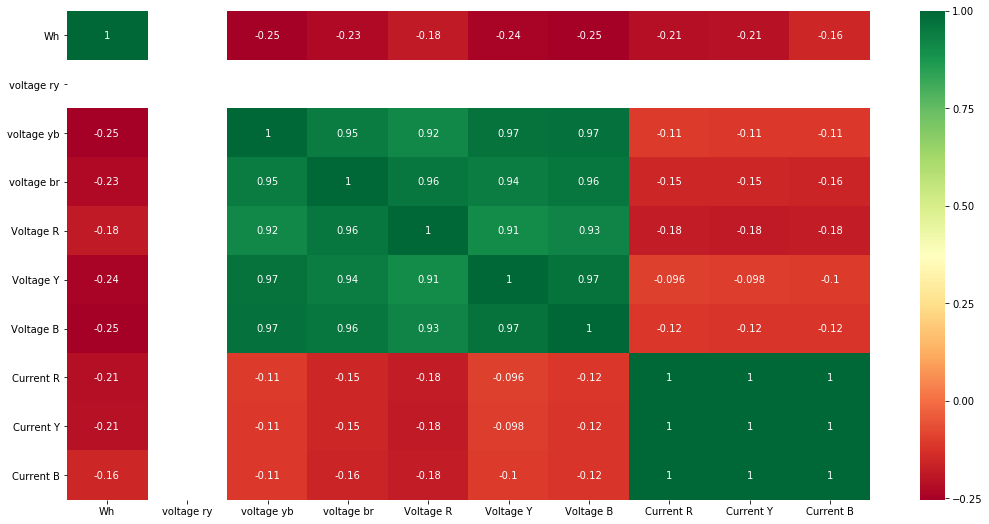

In [4]:
#Correlation in data
plt.figure(figsize=(18,9))
g = sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [5]:
#calculating phase power
df['phase power']=((df['Voltage R'] + df['Voltage Y'] + df['Voltage B'])/3) * ((df['Current R'] + df['Current Y'] + df ['Current B'])/3) * (3 ** 0.5) * 0.5

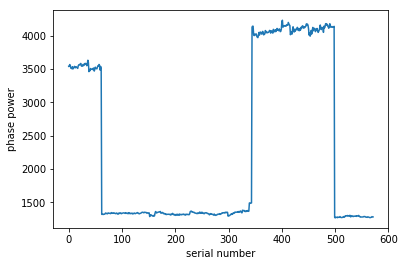

In [6]:
values=df['phase power']
# use the plot function
plt.plot(values)
plt.xlabel("serial number")
plt.ylabel("phase power")
plt.show()

In [7]:
#evaluating instantaneous power
df['instantaneous power']=df['Voltage R']*df['Current R'] + df['Voltage Y']*df['Current Y'] + df['Voltage B']*df['Current B']

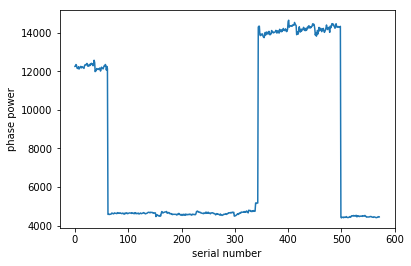

In [8]:
values=df['instantaneous power']
# use the plot function
plt.plot(values)
plt.xlabel("serial number")
plt.ylabel("phase power")
plt.show()

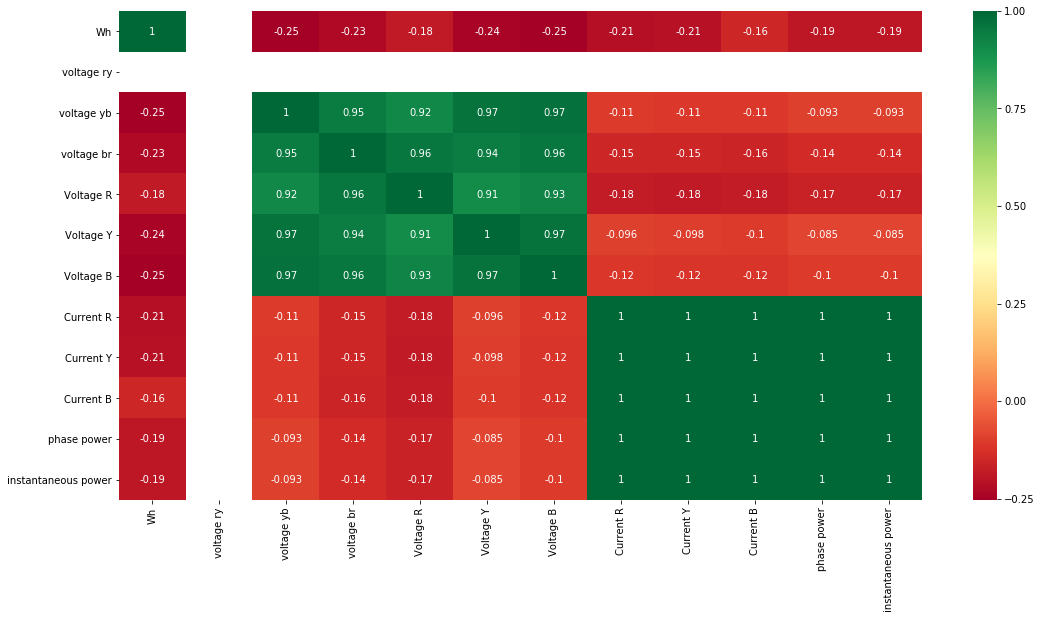

In [9]:
#Correlation in new data
plt.figure(figsize=(18,9))
g = sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

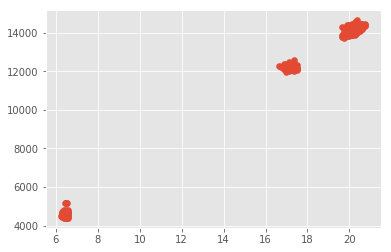

In [14]:
#plot between instantaneous power and Current R
y=df['instantaneous power']
x=df['Current R']
style.use("ggplot")
plt.scatter(x,y)
plt.show()

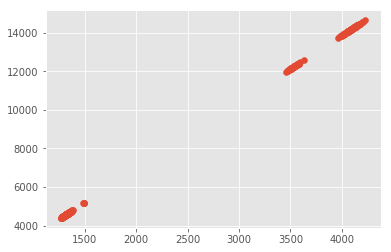

In [21]:
y=df['instantaneous power']
x=df['phase power']
style.use("ggplot")
plt.scatter(x,y)
plt.show()

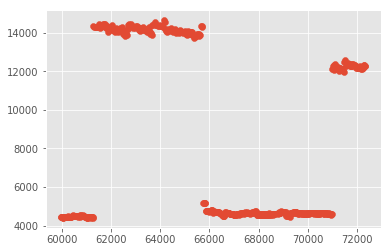

In [24]:
y=df['instantaneous power']
x=df['Wh']
style.use("ggplot")
plt.scatter(x,y)
plt.show()